# Description:
Inference time for pipelines that have been uploaded to the Hub.

# Implementation

In [1]:
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path):
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

In [2]:
import torch
from huggingface_hub import get_full_repo_name
from diffusers import DDPMPipeline
import utils

selected_gpu = 0 # here you select the GPU used (0, 1 or 2)
device = torch.device("cuda:" + str(selected_gpu) if torch.cuda.is_available() else "cpu")
print('The device is:', device)

The device is: cuda:0


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

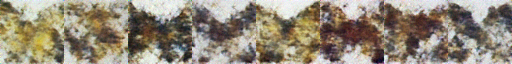

In [3]:
# Let's give our new model a name for the Hub
model_name = "Unconditional_Butterflies_diffusion"
hub_model_id = get_full_repo_name(model_name)

pipeline = DDPMPipeline.from_pretrained(hub_model_id).to(device)
images = pipeline(batch_size=8).images
utils.make_grid(images)